¿Qué librerías necesitamos?

Pandas

Matplotlib

Pandas Plotting

¿Cómo instalo las librerías?

conda install -c conda-forge matplotlib

https://anaconda.org/conda-forge/matplotlib

Desde Windows

pip install matplotlib

https://pypi.org/project/matplotlib/


pip install seaborn
conda install seaborn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
import seaborn as sns
from pandas.plotting import scatter_matrix
from pandas.plotting import autocorrelation_plot
from pandas.plotting import parallel_coordinates
from pandas.plotting import lag_plot
import numpy as np

En el paquete Seaborn, hay un pequeño conjunto de datos incorporado.Vamos a usar los datos de “mpg”, “tips” y “attention” para 

nuestra visualización. Los conjuntos de datos se cargan usando el método load_dataset en seaborn.

In [2]:
CarDatabase= sns.load_dataset("mpg")
MealDatabase= sns.load_dataset("tips")
AttentionDatabase= sns.load_dataset("attention")

In [3]:
CarDatabase.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,usa,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,usa,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,usa,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,usa,pontiac catalina
9,15.0,8,390.0,190.0,3850,8.5,70,usa,amc ambassador dpl


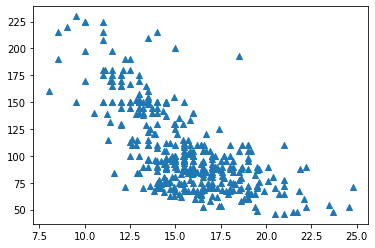

In [4]:
plt.scatter(CarDatabase.acceleration ,CarDatabase.horsepower, marker="^");
plt.show();

DataFrame.plot.hexbin(x, y, C=None, reduce_C_function=None, gridsize=None, **kwargs)

Parámetros

x: int o str - La etiqueta de columna o la posición de los puntos x.

y: int o str - La etiqueta de columna o la posición de los puntos y.

C: int o str, opcional - La etiqueta de columna o posición para el valor del punto (x, y).

reduce_C_function: callable, np.mean predeterminado

Función de un argumento que reduce todos los valores en un contenedor a un solo número (por ejemplo, np.mean, np.max, np.sum, np.std).

gridsize: int o tupla de (int, int), por defecto 100

El número de hexágonos en la dirección x. El número correspondiente de hexágonos en la dirección y se elige de manera que los 

hexágonos sean aproximadamente regulares. Alternativamente, gridsize puede ser una tupla con dos elementos que especifican el 

número de hexágonos en la dirección xy la dirección y.

Aclaración: una tupla es un conjunto ordenado e inmutable de elementos del mismo o diferente tipo. Las tuplas se representan 

escribiendo los elementos entre paréntesis y separados por comas

cmap: mapa de colores 

https://matplotlib.org/gallery/color/colormap_reference.html

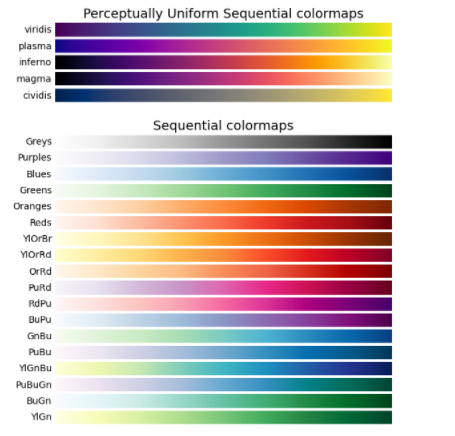

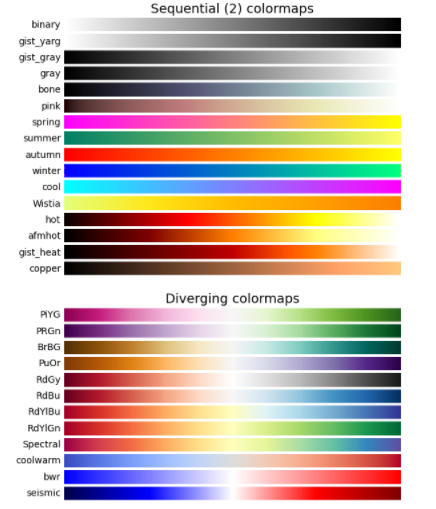

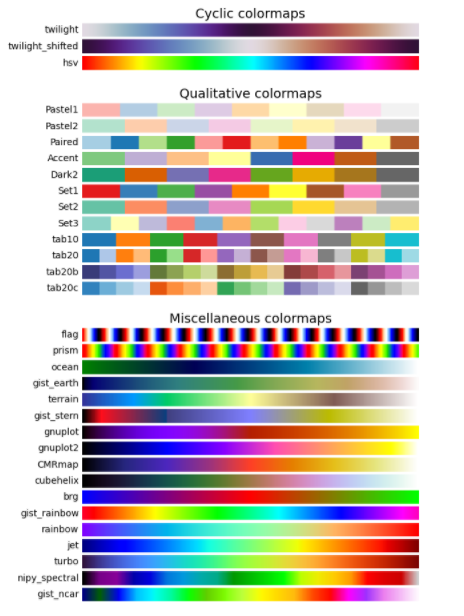

<AxesSubplot:xlabel='acceleration', ylabel='horsepower'>

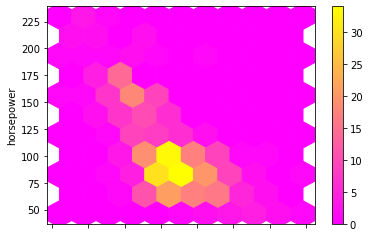

In [5]:
#autumn
#spring
#summer
#winter
#YlGnBu
CarDatabase.plot.hexbin(x='acceleration', y='horsepower', gridsize=10,cmap="spring")
#plt.show()

Los heatmaps o mapas de calor son útiles para ver la correlación entre las diferentes variables. 

En el siguiente código vamos a calcular la correlación por pares entre todas las variables en el conjunto de datos "mpg" de 

seaborn y trazándolo como un mapa de calor.

Parámtros annot = le estoy diciendo que le ponga los números en la correlación y cmap es el tipo de color (mapa de colores)

https://seaborn.pydata.org/generated/seaborn.heatmap.html

In [6]:
MealDatabase.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


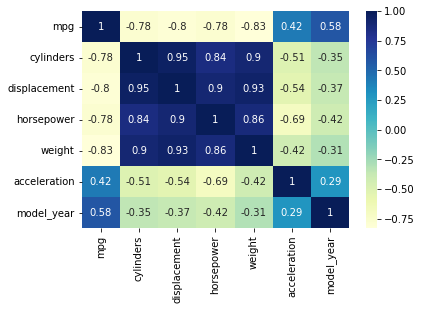

In [7]:
sns.heatmap(CarDatabase.corr(), annot=True, cmap="YlGnBu")
plt.show()

Gráfico de autocorrelación

Los gráficos de autocorrelación son una prueba rápida para determinar si los puntos de datos son aleatorios. 

En caso de que los puntos de datos sigan una determinada tendencia, una o más de las autocorrelaciones serán significativamente 

distintas de cero. La línea de puntos en el gráfico muestra 99%, banda de confianza.



En el siguiente código, estamos verificando si el monto total_bill en la base de datos de "tips" es aleatorio.

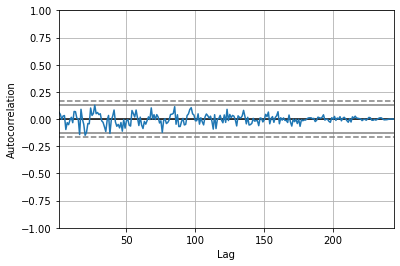

In [8]:
autocorrelation_plot(MealDatabase.total_bill)
plt.show()

Podemos ver que el gráfico de autocorrelación se acerca mucho a cero para todos los retrasos de tiempo, lo que sugiere que los puntos de datos de total_bill son aleatorios.

Si trazamos la gráfica de autocorrelación para los puntos de datos siguiendo un orden particular, podemos ver que la gráfica 

es significativamente diferente de cero.

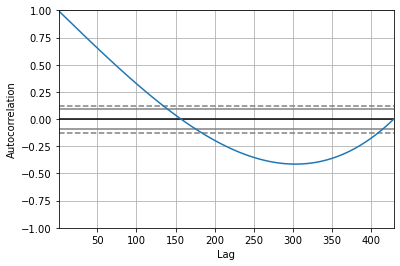

In [9]:
data = pd.Series(np.arange(12,7000,16.3))
autocorrelation_plot(data)
plt.show()

Gráficos Lags:

Los gráficos lags son útiles para verificar si el conjunto de datos es un conjunto de valores aleatorios o sigue una 

determinada tendencia.

Cuando se traza el gráfico de lags del valor de “total_bills” del conjunto de datos de “tips”, como en el gráfico de 

autocorrelación, el gráfico de lags lo sugiere como datos aleatorios con valores por todas partes.

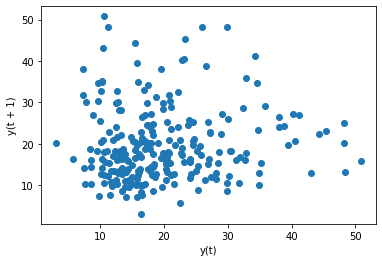

In [10]:
lag_plot(MealDatabase.total_bill)
plt.show()

Cuando trazamos con retraso una serie de datos no aleatorios, como se muestra en el código a continuación, obtenemos una buena 

línea suave.

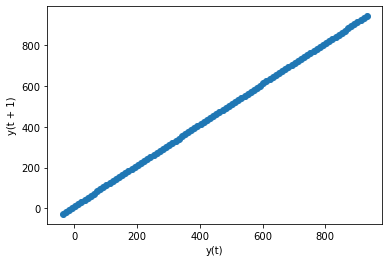

In [11]:
data = pd.Series(np.arange(-12*np.pi,300*np.pi,10))
lag_plot(data)
plt.show()

Gráfico de parallel coordinates /coordenadas paralelas

Cada dimensión está representada por una línea vertical.

En coordenadas paralelas, "N" líneas verticales igualmente espaciadas representan "N" dimensiones del conjunto de datos. La

posición del vértice en el n-ésimo eje corresponde a la n-ésima coordenada del punto.

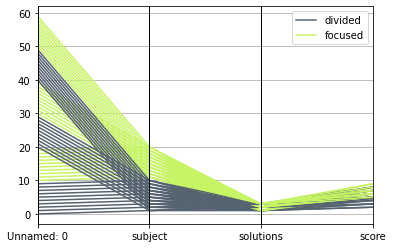

In [12]:
'#556270', '#C7F464'
parallel_coordinates(AttentionDatabase,"attention",color=('#556270', '#C7F464'))
plt.show()

In [13]:
AttentionDatabase.head()

,Unnamed: 0,subject,attention,solutions,score
0,0,1,divided,1,2.0
1,1,2,divided,1,3.0
2,2,3,divided,1,3.0
3,3,4,divided,1,5.0
4,4,5,divided,1,4.0
